In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

Mounted at /content/drive


# Loading in Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline_data_clean_final.csv',index_col=0)

In [ ]:
df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel
0,70172,13,460,3,4,3,1,5,3,5,...,False,0,0,1,1,0,0,1,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,False,1,0,0,0,1,0,1,1,0
2,110028,26,1142,2,2,2,2,5,5,5,...,True,1,0,0,1,0,1,0,1,0
3,24026,25,562,2,5,5,5,2,2,2,...,False,1,0,0,1,0,1,0,1,0
4,119299,61,214,3,3,3,3,4,5,5,...,True,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,78463,34,526,3,3,3,1,4,3,4,...,False,1,0,0,0,1,0,1,1,0
129483,71167,23,646,4,4,4,4,4,4,4,...,True,1,0,0,1,0,0,1,1,0
129484,37675,17,828,2,5,1,5,2,1,2,...,False,0,1,0,1,0,1,0,0,1
129485,90086,14,1127,3,3,3,3,4,4,4,...,True,1,0,0,1,0,0,1,1,0


In [ ]:
X = df.drop(['satisfaction','id'],axis=1)
y = df['satisfaction']
X.shape,y.shape

((129487, 27), (129487,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,stratify=y)

# Model Training

## Logistc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
yhat = lr.predict(X_test)
accuracy_score(y_test,yhat)

0.8153267948618941

In [ ]:
c = confusion_matrix(y_test,yhat)

In [ ]:
# Accuracy score
m1 = accuracy_score(y_test,yhat).round(2)

# True Positive Rate (TPR), aka recall, aka sensitivity
m2 = recall_score(y_test, yhat).round(2)

# Precision score
m3 = precision_score(y_test,yhat).round(2)

# f1 score which is between [0,1] (like an R_squared)
m4 = f1_score(y_test, yhat).round(2)

# MCC Score between [-1,1]
m5 = matthews_corrcoef(y_test, yhat)
print(f"Logistic Regression: accuracy: {m1} | TPR: {m2} | precision {m3} | f1: {m4} | MCC: {m5}\n")

Logistic Regression: accuracy: 0.82 | TPR: 0.83 | precision 0.77 | f1: 0.8 | MCC: 0.6290947464712522



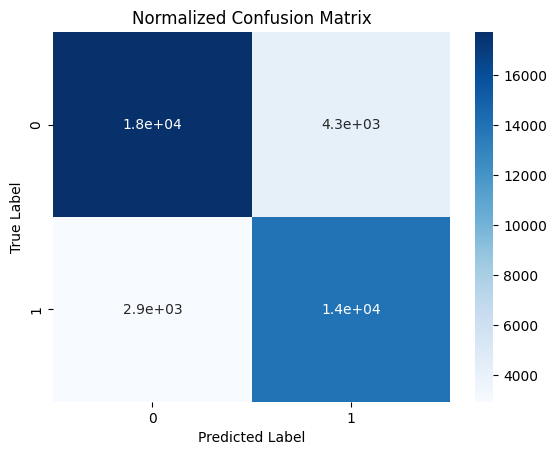

In [ ]:
sns.heatmap(c, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Normalized Confusion Matrix')
plt.show()

## Neural Networks

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# # data scaling
# scaleInput = MinMaxScaler()
# X = scaleInput.fit_transform(X)
# X.shape,y.shape

((129487, 27), (129487,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=27, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
2833/2833 [==============================] - 24s 7ms/step - loss: 0.2881 - accuracy: 0.8792 - val_loss: 0.2010 - val_accuracy: 0.9197
Epoch 2/5
2833/2833 [==============================] - 13s 5ms/step - loss: 0.1938 - accuracy: 0.9240 - val_loss: 0.1879 - val_accuracy: 0.9236
Epoch 3/5
2833/2833 [==============================] - 9s 3ms/step - loss: 0.1708 - accuracy: 0.9305 - val_loss: 0.1564 - val_accuracy: 0.9374
Epoch 4/5
2833/2833 [==============================] - 9s 3ms/step - loss: 0.1585 - accuracy: 0.9351 - val_loss: 0.1490 - val_accuracy: 0.9404
Epoch 5/5
2833/2833 [==============================] - 8s 3ms/step - loss: 0.1501 - accuracy: 0.9386 - val_loss: 0.1435 - val_accuracy: 0.9411


In [ ]:
yhat = model.predict(X_test)

1214/1214 [==============================] - 2s 1ms/step


In [ ]:
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(32, input_shape=(27,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_model, epochs=5, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 94.00% (0.26%)


In [ ]:
model= create_model()
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
preds = model.predict(X_test)
accuracy_score(y_test,preds)

Epoch 1/5
2833/2833 [==============================] - 8s 3ms/step - loss: 0.3025 - accuracy: 0.8804 - val_loss: 0.2180 - val_accuracy: 0.9145
Epoch 2/5
2833/2833 [==============================] - 8s 3ms/step - loss: 0.2039 - accuracy: 0.9195 - val_loss: 0.1821 - val_accuracy: 0.9291
Epoch 3/5
2833/2833 [==============================] - 8s 3ms/step - loss: 0.1763 - accuracy: 0.9303 - val_loss: 0.1626 - val_accuracy: 0.9377
Epoch 4/5
2833/2833 [==============================] - 8s 3ms/step - loss: 0.1596 - accuracy: 0.9379 - val_loss: 0.1516 - val_accuracy: 0.9409
Epoch 5/5
1214/1214 [==============================] - 2s 1ms/step


ValueError: ignored